# Chapter 12: The Normal Distribution

## Exercises

1. What is the probability of observing a value five sigma greater than the mean or more? 

2. A fever is any temperature greater than 100.4 degrees Fahrenheit. Given the following measurements, what is the probability that the patient has a fever?
   $$100.0, 99.8, 101.0, 100.5, 99.7$$

3. Suppose in Chapter 11 we tried to measure the depth of a well by timing coin drops and got the following values:
   $$2.5, 3, 3.5, 4, 2$$
   The distance an object falls can be calculated (in meters) with the following formula:
   $$\textrm{distance} = \frac{1}{2} \times G \times \textrm{time}^2$$
   where $G$ is $9.8\frac{m}{s^2}$.  What is the probability that the well is over 500 meters deep?

4. What is the probability that there is no well (i.e, the well is really 0 meters deep)?  You'll notice that the probability is higher than you might expect, given your observation that there _is_ a well.  There are two good explanationsf or this probability being higher than it should.  The first is that the normal distribution is a poor model for our measurements; the second is that, when making up numbers for an example, I chose values that you likely wouldn't see in real life.  Which is more likely to you?
  

## Responses

### Exercise 1

> 1. What is the probability of observing a value five sigma greater than the mean or more? 

In [6]:
import numpy as np
from scipy.stats import norm

five_sigma_right_tail = norm.sf(5)

print(f"The probability of observing an event at least 5 sigma or greater than the mean with a standard normal distribution is {five_sigma_right_tail}")

The probability of observing an event at least 5 sigma or greater than the mean with a standard normal distribution is 2.8665157187919333e-07


As you can see, the probability is vanishingly small.  

## Exercise 2

> 2. A fever is any temperature greater than 100.4 degrees Fahrenheit. Given the following measurements, what is the probability that the patient has a fever?
   $$100.0, 99.8, 101.0, 100.5, 99.7$$

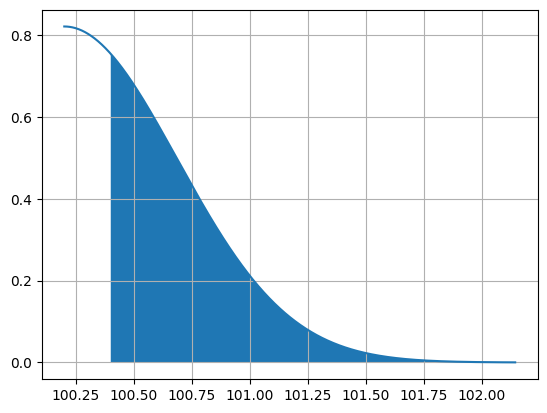

The probability that this patient has a fever is 0.3403


In [36]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

temps = np.array([100.0, 99.8, 101.0, 100.5, 99.7])
temps_mean = temps.mean()
temps_std = temps.std()
temps_dist = norm(temps_mean, temps_std)
fever_cutoff_F = 100.4
p_fever = temps_dist.sf(100.4)


x = np.linspace(temps_mean, temps_mean + 4*temps_std, 1000)
fig, ax = plt.subplots(1,1)
ax.plot(x, temps_dist.pdf(x))
ax.grid(True)
ax.fill_between(x, 0, temps_dist.pdf(x), where= x>=100.4)
plt.show()
print(f"The probability that this patient has a fever is {p_fever:.4}")


### Exercise 3

> 3. Suppose in Chapter 11 we tried to measure the depth of a well by timing coin drops and got the following values:
>    $$2.5, 3, 3.5, 4, 2$$
>    The distance an object falls can be calculated (in meters) with the following formula:
>    $$\textrm{distance} = \frac{1}{2} \times G \times \textrm{time}^2$$
>    where $G$ is $9.8\frac{m}{s^2}$.  What is the probability that the well is over 500 meters deep?

The probability that the well is 500 meters deep or more is: 1.259e-104
That has a z-score of 21.69


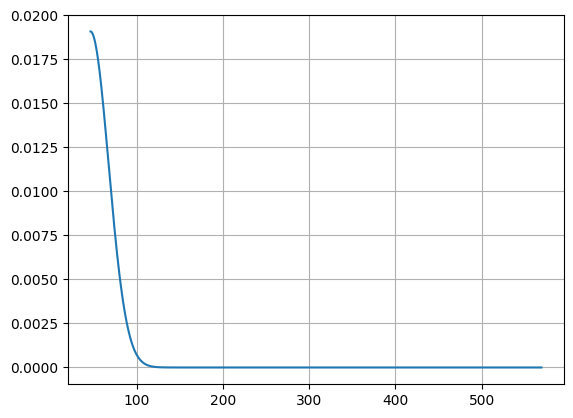

In [55]:
import numpy as np
from scipy.constants import g
from scipy.stats import norm
import matplotlib.pyplot as plt

well_times = np.array([2.5, 3, 3.5, 4, 2])
well_depths = 1/2 * g * np.square(well_times)
well_depth_mean = well_depths.mean()
well_depth_std = well_depths.std()

well_depth_norm_dist = norm(well_depth_mean, well_depth_std)


fig, ax = plt.subplots(1,1)
x = np.linspace(well_depth_mean, well_depth_mean + 25*well_depth_std, 1000)
y = well_depth_norm_dist.pdf(x)
ax.plot(x, y)
ax.fill_between(x, 0, y, where = x>500)
ax.grid(True)

prob_500 = well_depth_norm_dist.sf(500)
std_500 = (500-well_depth_mean)/well_depth_std

print(f"The probability that the well is 500 meters deep or more is: {prob_500:.4}\n"
      f"That has a z-score of {std_500:.4}")



### Exercise 4

> 4. What is the probability that there is no well (i.e, the well is really 0 meters deep)?  You'll notice that the probability is higher than you    might expect, given your observation that there _is_ a well.  There are two good explanationsf or this probability being higher than it should.  The first is that the normal distribution is a poor model for our measurements; the second is that, when making up numbers for an example, I chose values that you likely wouldn't see in real life.  Which is more likely to you?

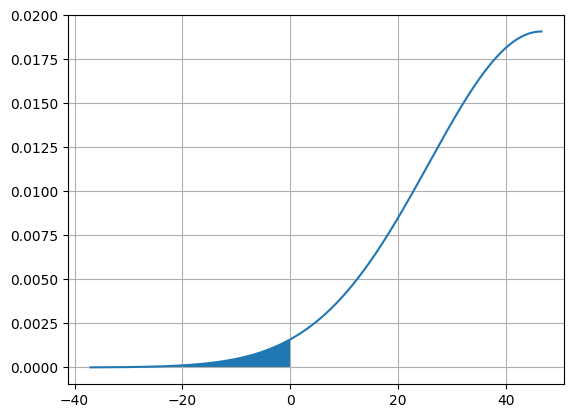

The probability that the well is 0 meters deep or less, that is, that there is no well, is: 0.01293


In [62]:
import numpy as np
from scipy.constants import g
from scipy.stats import norm
import matplotlib.pyplot as plt

well_times = np.array([2.5, 3, 3.5, 4, 2])
well_depths = 1/2 * g * np.square(well_times)
well_depth_mean = well_depths.mean()
well_depth_std = well_depths.std()

well_depth_norm_dist = norm(well_depth_mean, well_depth_std)

no_well_p = well_depth_norm_dist.cdf(0)

fig, ax = plt.subplots(1,1)
x = np.linspace(well_depth_mean - 4*well_depth_std, well_depth_mean, 1000)
y = well_depth_norm_dist.pdf(x)
ax.plot(x, y)
ax.fill_between(x, 0, y, where=x<=0)
ax.grid(True)
plt.show()

print(f"The probability that the well is 0 meters deep or less, that is, that there is no well, is: {no_well_p:.4}")

Of course it is more likely that these are unrealistic measurements than that there is a real chance someoen would mistakenly observe a well.